In this notebook quantum_ucc_ansatz.py is used to generate dissociation curves

In [1]:
import quantum_UCC_ansatz as qucca

import numpy as np

from qiskit_nature.second_q.drivers import PySCFDriver

from pyscf import gto, cc, dft, scf
from pyscf.fci import FCI

import psi4
from CID_code import calculate_CID

import pickle

Defining the linspace

In [2]:
lin = np.linspace(0.4, 4.5, 5)

In [3]:
# classical_CC = []
UCCS = []
pUCCD = []
pUCCSD = []

classical_CCSD = []
classical_CCSD_T = []

# comp_UCCS = []
# comp_pUCCD = []
# comp_pUCCSD = []

fci = []
cid = []
hf = []

for r in lin:

    print("-"*20, f"\nr = {r}\n", "-"*20)

    driver = PySCFDriver(atom=f"H 0 0 0; H 0 0 {r}", spin=0, basis="sto-3g")
    mol = driver.run()

    # singles
    print("UCCS")
    ansatz = qucca.CustomAnsatz(mol, singles=True)
    UCCS.append(qucca.solve(mol, ansatz.circuit))

    # # compressed singles
    # ansatz = qucca.CustomAnsatz(mol)
    # for exc in ansatz.generate_CCS_excitations():
    #     ansatz.add_compressed_single(exc[0], exc[1])
    # comp_UCCS.append(qucca.solve(mol, ansatz.circuit))

    # pair doubles
    print("pUCCD")
    ansatz = qucca.CustomAnsatz(mol, pair_doubles=True)
    pUCCD.append(qucca.solve(mol, ansatz.circuit))

    # # compressed pair doubles
    # ansatz = qucca.CustomAnsatz(mol)
    # for exc in ansatz.generate_pCCD_excitations():
    #     ansatz.add_compressed_double(exc[0], exc[1])
    # comp_pUCCD.append(qucca.solve(mol, ansatz.circuit))

    # singles & pair doubles
    print("pUCCSD")
    ansatz = qucca.CustomAnsatz(mol, singles=True, pair_doubles=True)
    pUCCSD.append(qucca.solve(mol, ansatz.circuit))

    # # compressed UpCCSD
    # ansatz = qucca.CustomAnsatz(mol)
    # for exc in ansatz.generate_CCS_excitations():
    #     ansatz.add_compressed_single(exc[0], exc[1])
    # for exc in ansatz.generate_pCCD_excitations():
    #     ansatz.add_compressed_double(exc[0], exc[1])
    # comp_pUCCSD.append(qucca.solve(mol, ansatz.circuit))


    mol = gto.Mole()
    mol.atom = f"H 0 0 0; H 0 0 {r}"
    mol.basis = 'sto-3g'
    mol.spin=0
    mol.build()

    # fci
    print("fci")
    mf = mol.RHF().run()
    cisolver = FCI(mf)
    fci.append(cisolver.kernel()[0])

    # hf
    print("hf")
    mf = scf.RHF(mol)
    hf.append(mf.kernel())

    # cc
    mf = scf.HF(mol).run()
    # Note that the line following these comments could be replaced by
    # mycc = cc.CCSD(mf)
    # mycc.kernel()
    mycc = cc.CCSD(mf).run()
    classical_CCSD.append(mycc.e_tot)
    et = mycc.ccsd_t()
    classical_CCSD_T.append(mycc.e_tot + et)


    mol = psi4.geometry(f"""
                        H 0 0 0
                        H 0 0 {r}
                        symmetry c1
                        """)

    psi4.set_options({'basis': 'sto-3g',
                    'scf_type': 'pk',
                    'e_convergence': 1e-8,
                    'd_convergence': 1e-8})

    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    cid.append(calculate_CID(mol, scf_e, wfn))

-------------------- 
r = 0.4
 --------------------
UCCS


/usr/local/miniconda3/lib/python3.7/site-packages/qiskit_nature/deprecation.py:297: PauliSumOpDeprecationWarning: PauliSumOp is deprecated as of version 0.6.0 and support for them will be removed no sooner than 3 months after the release. Instead, use SparsePauliOp. You can switch to SparsePauliOp immediately, by setting `qiskit_nature.settings.use_pauli_sum_op` to `False`.
  return func(*args, **kwargs)


pUCCD
pUCCSD
fci
converged SCF energy = -0.90436139416354
hf
converged SCF energy = -0.90436139416354
converged SCF energy = -0.90436139416354
E(CCSD) = -0.9141497227610512  E_corr = -0.009788328597511399
CCSD(T) correction = -5.72138477802078e-47
-------------------- 
r = 1.4249999999999998
 --------------------
UCCS
pUCCD
pUCCSD
fci
converged SCF energy = -0.933712442025504
hf
converged SCF energy = -0.933712442025504
converged SCF energy = -0.933712442025504
E(CCSD) = -1.010899108880724  E_corr = -0.07718666685521931
CCSD(T) correction = 1.61373927959149e-47
-------------------- 
r = 2.4499999999999997
 --------------------
UCCS
pUCCD
pUCCSD
fci
converged SCF energy = -0.709250219239347
hf
converged SCF energy = -0.709250219239347
converged SCF energy = -0.709250219239347
E(CCSD) = -0.936605256421879  E_corr = -0.2273550371825316
CCSD(T) correction = 0
-------------------- 
r = 3.4749999999999996
 --------------------
UCCS
pUCCD
pUCCSD
fci
converged SCF energy = -0.630801403043984
h

In [4]:
# from datetime import datetime
# import pickle
# import os


# now = datetime.now()

# name = now.strftime(f"%d-%m-%y_%H-%M_LiH_lin")
# with open( os.path.join("saved_calculations", f"{name}.pkl"), 'wb') as file:
#     pickle.dump(lin, file)

# name = now.strftime(f"%d-%m-%y_%H-%M_LiH_UCCS")
# with open( os.path.join("saved_calculations", f"{name}.pkl"), 'wb') as file:
#     pickle.dump(UCCS, file)

# name = now.strftime(f"%d-%m-%y_%H-%M_LiH_pUCCD")
# with open( os.path.join("saved_calculations", f"{name}.pkl"), 'wb') as file:
#     pickle.dump(pUCCD, file)

# name = now.strftime(f"%d-%m-%y_%H-%M_LiH_pUCCSD")
# with open( os.path.join("saved_calculations", f"{name}.pkl"), 'wb') as file:
#     pickle.dump(pUCCSD, file)

# name = now.strftime(f"%d-%m-%y_%H-%M_LiH_comp_UCCS")
# with open( os.path.join("saved_calculations", f"{name}.pkl"), 'wb') as file:
#     pickle.dump(comp_UCCS, file)

# name = now.strftime(f"%d-%m-%y_%H-%M_LiH_comp_pUCCD")
# with open( os.path.join("saved_calculations", f"{name}.pkl"), 'wb') as file:
#     pickle.dump(comp_pUCCD, file)

# name = now.strftime(f"%d-%m-%y_%H-%M_LiH_comp_pUCCSD")
# with open( os.path.join("saved_calculations", f"{name}.pkl"), 'wb') as file:
#     pickle.dump(comp_pUCCSD, file)

# name = now.strftime(f"%d-%m-%y_%H-%M_LiH_fci")
# with open( os.path.join("saved_calculations", f"{name}.pkl"), 'wb') as file:
#     pickle.dump(fci, file)

# name = now.strftime(f"%d-%m-%y_%H-%M_LiH_hf")
# with open( os.path.join("saved_calculations", f"{name}.pkl"), 'wb') as file:
#     pickle.dump(hf, file)

In [5]:
# classical_CCSD = []
# classical_CCSD_T = []

# fci = []
# hf = []

# for r in lin:

#     print("-"*20, f"\nr = {r}\n", "-"*20)

#     mol = gto.Mole()
#     mol.atom = f"H 0 0 0; Li 0 0 {r}"
#     mol.basis = 'sto-3g'
#     mol.spin=0
#     mol.build()

#     # fci
#     print("fci")
#     mf = mol.RHF().run()
#     cisolver = FCI(mf)
#     fci.append(cisolver.kernel()[0])

#     # hf
#     print("hf")
#     mf = scf.RHF(mol)
#     hf.append(mf.kernel())

#     # cc
#     mf = scf.HF(mol).run()
#     # Note that the line following these comments could be replaced by
#     # mycc = cc.CCSD(mf)
#     # mycc.kernel()
#     mycc = cc.CCSD(mf).run()
#     classical_CCSD.append(mycc.e_tot)
#     et = mycc.ccsd_t()
#     classical_CCSD_T.append(mycc.e_tot + et)
    

In [6]:
# with open("saved_calculations/21-06-23_17-19_LiH_pUCCSD.pkl", "rb") as file:
#     pUCCSD = pickle.load(file)

In [7]:
# for r, f, csd, csdt, sd in zip( lin, fci, classical_CCSD, classical_CCSD_T, pUCCSD):
#     print(f"r = {r}\nfci = {round(f,6)} | pUCCSD = {round(sd,6)} | diff = {round( sd - f, 6)}")
#     print(f"r = {r}\nfci = {round(f,6)} | CCSD = {round(csd,6)} | diff = {round( csd - f, 6)}")
#     print(f"r = {r}\nfci = {round(f,6)} | CCSDT = {round(csdt,6)} | diff = {round( csdt - f, 6)}")
#     print("\n")

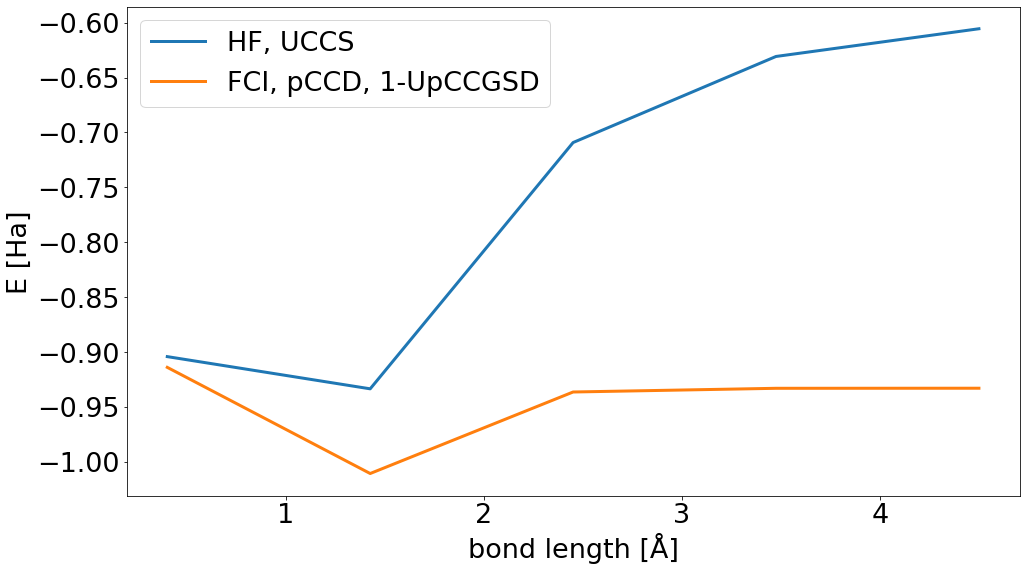

In [4]:
import matplotlib.pyplot as plt

# Set font size
plt.rcParams['font.size'] = 27

plt.figure(figsize=(16, 9))

# plt.plot(lin, UCCS, label="UCCS ansatz", lw=3)
# plt.plot(lin, pUCCSD, label="pUCCSD ansatz")

# plt.plot(lin, classical_CCSD, label="pCCD", ls="-", lw=3)
# plt.plot(lin, classical_CCSD_T, label="CCSD_T")


# plt.plot(lin, comp_UCCS, label="comp_UCCS ansatz")
# plt.plot(lin, comp_pUCCD, label="comp_pUCCD ansatz")
# plt.plot(lin, comp_pUCCSD, label="comp_pUCCSD ansatz")

plt.plot(lin, hf, label="HF, UCCS", ls="-", lw=3)
plt.plot(lin, fci, label="FCI, pCCD, 1-UpCCGSD", ls="-", lw=3)

# plt.plot(lin, cid, label="cid", ls="-.")

# plt.plot(lin, pUCCD, label="1-UpCCGSD ansatz", ls="-.", lw=3)


plt.legend()

# plt.title("Comparison of dissociation curves of H2")
plt.xlabel('bond length [Å]')
plt.ylabel('E [Ha]')

plt.savefig("QC_UCC_HH.pdf")

## Noisy computations

The noisy calculations are performed in tequila, which fails to create a molecule for certain bond lengths. Because of this the calculations are save in a pickle file. When a calculation fails, the previous ones can be retrieved from the pickle files, and after adjusting the linspace, the calculations can be continued. (if tequila fails for r=4.5, try r=4.50001)

In [6]:
# classical_CC = []
# UCCS = []
pUCCD_noisy = []
# pUCCSD = []

for r in lin:

    print("-"*20, f"\nr = {r}\n", "-"*20)

    driver = PySCFDriver(atom=f"H 0 0 0; H 0 0 {r}", spin=0, basis="sto-3g")
    mol = driver.run()

    # # singles
    # print("UCCS")
    # ansatz = qucca.CustomAnsatz(mol, singles=True)
    # UCCS.append(qucca.solve_noisy(mol, ansatz.circuit))

    # pair doubles
    print("pUCCD")
    ansatz = qucca.CustomAnsatz(mol, pair_doubles=True)
    res = qucca.solve_noisy(mol, ansatz.circuit)
    pUCCD_noisy.append(res)
    print(res)

    # # singles & pair doubles
    # print("pUCCSD")
    # ansatz = qucca.CustomAnsatz(mol, singles=True, pair_doubles=True)
    # pUCCSD.append(qucca.solve_noisy(mol, ansatz.circuit))

-------------------- 
r = 0.4
 --------------------
pUCCD
0.18254872187069004
-------------------- 
r = 1.4249999999999998
 --------------------
pUCCD
-0.8227049074670628
-------------------- 
r = 2.4499999999999997
 --------------------
pUCCD
-0.5275160068794075
-------------------- 
r = 3.4749999999999996
 --------------------
pUCCD
-0.6415514854404678
-------------------- 
r = 4.5
 --------------------
pUCCD
-0.7267435326140982


In [38]:
lin = np.linspace(4.50001, 4.5, 1)

In [8]:
with open("pUCCD_noisy_2_2.pkl", "rb") as file:
    pUCCD_noisy_2 = pickle.load(file)

with open("real_lin_2.pkl", "rb") as file:
    real_lin = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'pUCCD_noisy_2_2.pkl'

In [10]:
# pUCCD_noisy_2 = []
# real_lin = []
pUCCD_noisy_2 = pUCCD_noisy
real_lin = lin

for r in lin:

    print("-"*20, f"\nr = {r}\n", "-"*20)

    # pair doubles
    print("UpCCD")
    # ansatz = qucca.CustomAnsatz(mol, pair_doubles=True)
    res = qucca.solve_noisy_2(r)
    pUCCD_noisy_2.append(res)
    print(res)
    real_lin.append(r)

    with open("pUCCD_noisy_2_2.pkl", "wb") as file:
        pickle.dump(pUCCD_noisy_2, file)

    with open("real_lin_2.pkl", "wb") as file:
        pickle.dump(real_lin, file)



-------------------- 
r = 0.4
 --------------------
UpCCD
Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qiskit
device          : fake_rome
samples         : 1000000
save_history    : True
noise           : None

Method          : COBYLA
Objective       : 2 expectationvalues

active variables : 2



KeyboardInterrupt: 

In [ ]:
# with open("noisy_CID.pkl", "rb") as file:
#     noisy_pUCCD = pickle.load(file)

In [47]:
with open("pUCCD_noisy_2_2.pkl", "rb") as file:
    pUCCD_noisy_2 = pickle.load(file)

with open("real_lin_2.pkl", "rb") as file:
    real_lin = pickle.load(file)

In [48]:
len(pUCCD_noisy_2)

50

In [41]:
pUCCD_nois = [i.energy for i in pUCCD_noisy_2]

In [11]:
import matplotlib.pyplot as plt
# Set font size
plt.rcParams['font.size'] = 27

plt.figure(figsize=(16, 9))

# plt.plot(lin, UCCS, label="UCCS ansatz")
plt.plot(real_lin, pUCCD_nois, label="noisy 1-UpGCCSD ansatz", lw=2)
# plt.plot(lin, pUCCSD, label="pUCCSD ansatz")

plt.plot(lin, fci, label="FCI", ls="--", lw=2)
plt.plot(lin, hf, label="HF", ls="--", lw=2)
# plt.plot(lin, cid, label="cid", ls="-.")

plt.legend()

# plt.title("Comparison of dissociation curves of H2")
plt.xlabel('bond length [Å]')
plt.ylabel('E [Ha]')

plt.savefig("QC_UCC_HH_noisy.pdf")

NameError: name 'pUCCD_nois' is not defined

<Figure size 1152x648 with 0 Axes>